In [6]:
from transformers import PaliGemmaProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import numpy as np
from datasets import load_dataset

In [2]:
question = """Analyze the provided medical brain imaging scan. Describe the type of scan, key anatomical structures visible, and any abnormal findings. Focus on: Identifying the imaging modality (e.g., CT, MRI) Describing the view and orientation of the scan Noting any visible anatomical structures Identifying and describing any abnormalities or areas of concern Specifying the location of abnormalities using anatomical terms Suggesting possible clinical implications of the findings Provide a concise yet comprehensive analysis in a professional medical tone."""


In [3]:
dataset = load_dataset("gokulsabari/brain_scan")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'id', 'caption', 'ground_truth'],
        num_rows: 136960
    })
    test: Dataset({
        features: ['image', 'id', 'caption', 'ground_truth'],
        num_rows: 24170
    })
})

In [7]:
model_id = "gokulsabari/paligemma-adapter"
fine_tuned_model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = PaliGemmaProcessor.from_pretrained("google/paligemma-3b-pt-224")

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\paligemma\configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

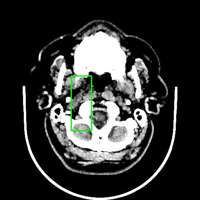

In [14]:
test_image_number = 500
test_image = dataset['test'][test_image_number]['image']
test_image.resize((200,200))

In [15]:
inputs = processor(question, test_image, return_tensors='pt')

output = fine_tuned_model.generate(**inputs, max_new_tokens=200)

print(processor.decode(output[0], skip_special_tokens=True)[len(question):])


The image shown here, obtained via a medical CT scan of the brain, features a region of interest located at the left-center upper-middle portion of the image. The area of interest displays a pattern of abnormality, characterized by its location and appearance, which is different in size and density from the surrounding brain tissue. The affected area is located in the middle of the brain, near the top and bottom of the image, and is characterized by its proximity to the cranial nerves and the dura mater. The affected area is notable for its abnormal density, which is different in size and density from the surrounding brain tissue. The affected area is also characterized by its location in the middle of the brain, near the top and bottom of the image, and is notable for its proximity to the cranial nerves and the dura mater. The affected area is also characterized by its location in the middle of the brain, near the top and bottom of the image, and is notable for its proximity to the c

In [16]:
dataset['test'][test_image_number]['caption']

"This CT scan of the brain shows a region of interest located centrally and in the lower-middle area, occupying approximately 2.8% of the image area. The region of interest is characterized by an abnormality that differs in density from the surrounding brain tissue, which could indicate the presence of an intracranial hemorrhage, subdural hematoma, or blebs. The abnormality's proximity to other brain structures suggests a potential mass effect or displacement of adjacent tissues, which could be related to the pathophysiology of the hemorrhage or its consequences on surrounding brain areas."

#### Base Model Performance

In [17]:
base_model = base_model = PaliGemmaForConditionalGeneration.from_pretrained("google/paligemma-3b-pt-224")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [18]:
inputs = processor(question, test_image, return_tensors='pt')

output = base_model.generate(**inputs, max_new_tokens=200)

print(processor.decode(output[0], skip_special_tokens=True)[len(question):])


image


In [14]:
image = Image.open("hematoma.jfif")
image_array = np.array(image)
image_array.shape

(225, 225, 3)

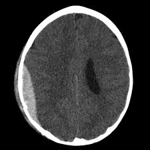

In [15]:
image.resize((150,150))

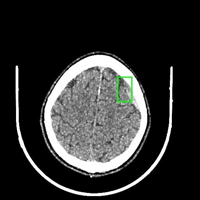

In [30]:
image = dataset['test'][800]['image']
image.resize((200,200))

In [31]:
inputs = processor(PROMPT, image, return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=200)

print(processor.decode(output[0], skip_special_tokens=True)[len(PROMPT):])


The middle upper left part of the image, which is approximately 3.3% of the brain tissue, is exhibiting a distinct appearance. The region is characterized by its different density compared to the surrounding brain tissue, which is not as dense. The area's texture and location are indicative of a different density, suggesting a different tissue composition or structure. The brain tissue in this area appears to have a higher density than the surrounding brain tissue, which is likely due to a different underlying pathology or condition. The brain tissue in this area's location is likely indicative of a different underlying condition or pathology, which may be associated with a different clinical course or outcome.


In [32]:
dataset['test'][800]['caption']

"The image is a non-contrast computed tomography (CT) scan of the brain, showing the cerebral structures without the use of contrast media. The region of interest, located in the right-center horizontally and in the middle vertically, occupies approximately 0.9% of the area. This region exhibits an unusual appearance, likely indicating a subdural hematoma, characterized by a hyperdense (brighter) area compared to the surrounding brain tissue, which is a common sign of acute bleeding. The affected area's proximity to other cerebral structures suggests a potential mass effect or displacement of adjacent brain tissue, which could be a result of the hemorrhage exerting pressure or due to the volume it occupies."

In [26]:
import numpy as np
image = np.array(image)
image.shape

(512, 512, 3)